In [37]:
import tensorflow as tf
import os

from tensorflow import keras
import random
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from math import floor, ceil, pi
import numpy as np 
%matplotlib inline



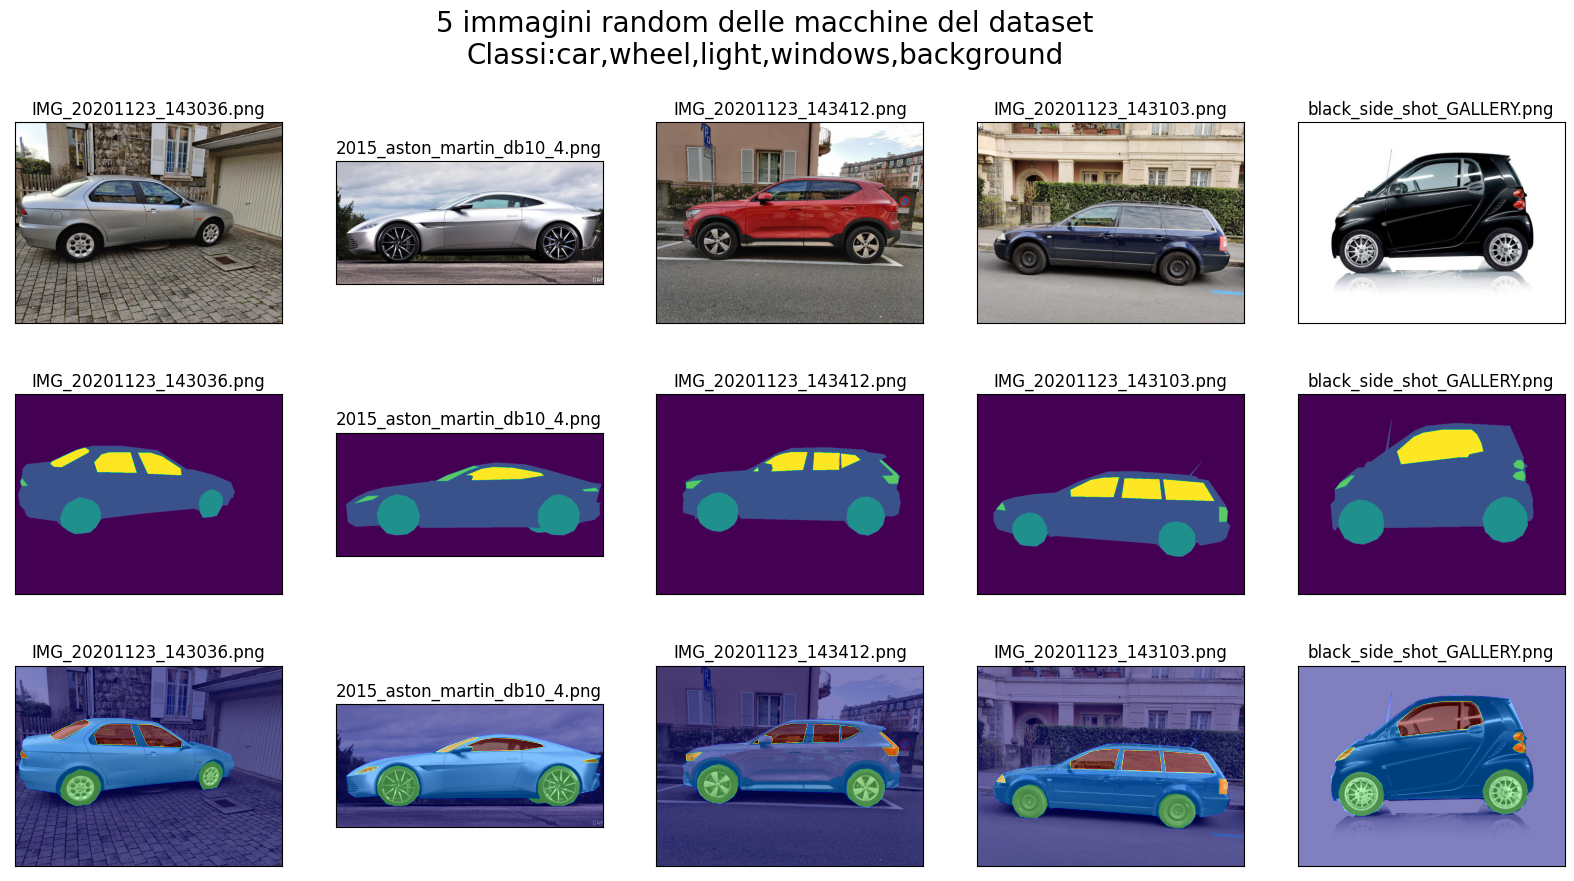

In [38]:
#Get Directory of car-segmentation images
parent = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) #parent directory
img_folder = os.path.join(parent, "car-segmentation", "images")
masks_folder = os.path.join(parent, "car-segmentation", "masks")

#Print of 5 random images from directory
fig = plt.figure(figsize=(20, 10))#(width,height)
fig.tight_layout()

for i in range(5):
    #1) Mostro L'IMMAGINE
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax = fig.add_subplot(3, 5, i+1)# 3 righe x 5 colonne, attualmente in posizione i+1
    #Imposto il titolo dell'immagine e rimuovo gli assi
    ax.title.set_text(file)
    ax.set_xticks([])
    ax.set_yticks([])
    #Titolo generale del grafo
    plt.suptitle('5 immagini random delle macchine del dataset\nClassi:car,wheel,light,windows,background', fontsize=20)
    plt.imshow(img)
    
    #2) Mostro la MASCHERA
    mask_path = os.path.join(masks_folder,file)
    mask = mpimg.imread(mask_path)
    ax = fig.add_subplot(3, 5, i+6)
    ax.title.set_text(file)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(mask)
    
    #3) Mostro la MASCHERA SOVRAPPOSTA ALL'IMMAGINE DI PARTENZA
    ax = fig.add_subplot(3, 5, i+11)
    ax.title.set_text(file)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.5)
  

Dopo aver capovolto le immagini, cambiare le etichette in modo che il set di addestramento e il set di test contengano ciascuno 50 immagini della stessa categoria di dati, metà delle quali sono capovolte orizzontalmente e metà sono capovolte.

In [39]:
def get_image_paths():
    folder = './images'
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

Resize images to a common size

In [48]:
MAGE_SIZE = 224

def tf_resize_images(imgs):
    X_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize_images(X, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Each image is resized individually as different image may be of different size.
        for index, file_path in enumerate(imgs):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data



In [49]:
X_imgs = tf_resize_images(imgs)
print(X_imgs.shape)

NameError: name 'imgs' is not defined

In [50]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize = (12, 12))
plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread(X_img_paths[0])[:,:,:3])
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(X_imgs[0])
plt.title('Resized Image')
plt.show()

NameError: name 'matplotlib' is not defined

Rotate

In [51]:
def rotate_images(imgs):
    X_rotate = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (IMAGE_SIZE, IMAGE_SIZE, 3))
    k = tf.placeholder(tf.int32)
    tf_img = tf.image.rot90(X, k = k)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for img in imgs:
            for i in range(3):  # Rotation at 90, 180 and 270 degrees
                rotated_img = sess.run(tf_img, feed_dict = {X: img, k: i + 1})
                X_rotate.append(rotated_img)
        
    X_rotate = np.array(X_rotate, dtype = np.float32)
    return X_rotate    


In [52]:
rotated_imgs = rotate_images(imgs)
print(rotated_imgs.shape)

NameError: name 'imgs' is not defined

/tmp/ipykernel_86331/2423515210.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


NameError: name 'imgs' is not defined

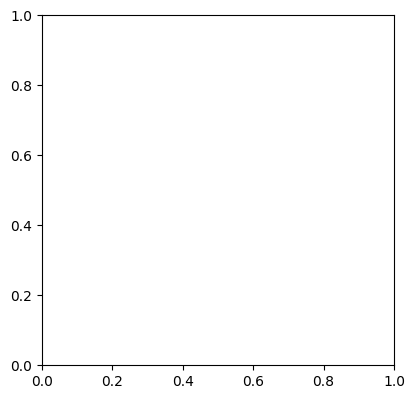

In [53]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(imgs[4])
plt.title('Base Image')
plt.subplot(2, 2, 2)
plt.imshow(rotated_imgs[12])
plt.title('Rotate 90 degrees')
plt.subplot(2, 2, 3)
plt.imshow(rotated_imgs[13])
plt.title('Rotate 180 degrees')
plt.subplot(2, 2, 4)
plt.imshow(rotated_imgs[14])
plt.title('Rotate 270 degrees')
plt.show()